# Neural Network with Pytorch  

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Prepare the data  - loading the MNIST dataset

train = datasets.MNIST('', train = True, download = True,
                      transform = transforms.Compose([
                          transforms.ToTensor()
                      ]))

test = datasets.MNIST('', train = False, download = True,
                      transform = transforms.Compose([
                          transforms.ToTensor()
                      ]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [3]:
# Let's checking the input data and labels (classification)
for data in trainset:
    X, y = data[0][0], data[1][0]

In [4]:
print(data[1])

tensor([2, 8, 0, 2, 5, 8, 7, 6, 4, 3])


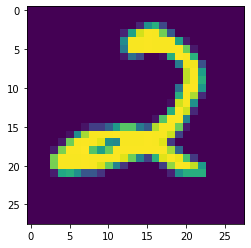

In [5]:
# install matplotlib

import matplotlib.pyplot as plt 

plt.imshow(data[0][0].view(28,28))
plt.show()

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

net = Net()
print(net)

Net()


In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
# Model preparation, layers, activation

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
# Optimizer - gradient decent, ADAM

import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [16]:
# Let's do 3 full passes over the data

for epoch in range(3): 
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
        
# let's print loss. We hope loss (a measure of wrong-ness) declines        
print(loss)  

tensor(0.2099, grad_fn=<NllLossBackward>)


In [17]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784)) # 784 b/c 28*28 image resolution.
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.969


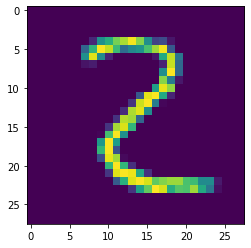

In [18]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [19]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(2, grad_fn=<NotImplemented>)
